# 20Newsgroups dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import mmread
import mpmath as mp
from scipy.optimize import minimize
import time
%matplotlib inline

In [2]:
from scipy.sparse import csr_matrix

In [4]:
import seaborn as sns

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [6]:
# take out os windows one coz anomaly
target_names=['alt.atheism',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

what should alpha be for each of the 20 newsgroups?

In [7]:
alpha_est = {}
for name in target_names:
    newsgroups_train = fetch_20newsgroups(subset='train', categories=[name])
    vectors=vectorizer.fit_transform(newsgroups_train.data)
    test_mat=vectors
    test_mat.data=np.ones(test_mat.data.size)
    alpha_est[name]=(sum(test_mat.data)/test_mat.shape[0])

In [8]:
def exponent_vec_fn(n,c,sigma):
    exponent_vec = np.zeros(n)
    for i in range(1,n+1):
        # work on log scale to avoid overflow for each summand
        log_summand_vec = [np.log((c+sigma+j-1)/(c+j)) for j in range(1,i)]
        summand_term = np.exp(sum(log_summand_vec))
        exponent_vec[i-1] = summand_term
    return(exponent_vec)
    

In [9]:
# calculates the negative loglikelihood
def negloglik(param, mat):
    alpha = param[0]
    c = param[1]
    sigma = param[2]
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = exponent_vec_fn(n, c, sigma)
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * sum(exponent_vec)) + sum(prod_vec) + K* np.log(alpha)
    print(param)
    return(np.real(-loglikelihood)-200000)

In [10]:
# calculates the negative loglikelihood
def negloglik_unstable(param, mat):
    alpha = param[0]
    c = param[1]
    sigma = 0
    Z = mat
    n = Z.shape[0] # number of rows
    exponent_vec = exponent_vec_fn(n, c, sigma)
    m = np.asarray(Z.sum(axis=0)).flatten().astype(int)  # sum of columns
    K = len(m)
    prod_vec = (sp.special.loggamma(m - sigma) + sp.special.loggamma(n - m + c + sigma) + sp.special.loggamma(1 + c)) - (sp.special.loggamma(1 - sigma) + sp.special.loggamma(c + sigma) + sp.special.loggamma(n + c))
    loglikelihood = (-alpha * sum(exponent_vec)) + sum(prod_vec) + K* np.log(alpha)
    print(param)
    return(np.real(-loglikelihood)-200000)

In [11]:
# constraints on param = (alpha, c, sigma)
cons = ({'type': 'ineq', 'fun': lambda x: x[1] + x[2]})

In [12]:
# calculate parameters for stable
start = time.time()
results = {}
initial = np.array([135, 4, 0.5])
for name in target_names:
    newsgroups_train = fetch_20newsgroups(subset='train', categories=[name])
    vectors = vectorizer.fit_transform(newsgroups_train.data)
    test_mat = vectors
    test_mat.data = np.ones(test_mat.data.size)
    result_min = minimize(negloglik, initial, constraints = cons, 
                          bounds=((0, None), (-1, None), (0, 1)), args=(test_mat), options={'disp':True})
    results[name]=result_min.x
    result_min
    
elapsed = time.time() - start

[135.    4.    0.5]
[135.    4.    0.5]
[135.00000001   4.           0.5       ]
[135.           4.00000001   0.5       ]
[135.           4.           0.50000001]
[140.88085938  23.59375      1.        ]
[135.58808594   5.959375     0.55      ]
[135.05880859   4.1959375    0.505     ]
[135.02138617   4.0712541    0.50181829]
[135.02138617   4.0712541    0.50181829]
[135.02138619   4.0712541    0.50181829]
[135.02138617   4.07125412   0.50181829]
[135.02138617   4.0712541    0.5018183 ]


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


[138.83447695  -0.66657804   0.66657804]
[135.40269525   3.59747089   0.51829426]
[135.11208231   3.95856256   0.50573717]
[135.11208231   3.95856256   0.50573717]
[135.11208233   3.95856256   0.50573717]
[135.11208231   3.95856257   0.50573717]
[135.11208231   3.95856256   0.50573719]
[ 3.41248460e+02 -3.08969176e-01  3.08969176e-01]
[155.72572009   3.53180938   0.48606037]
[155.72572009   3.53180938   0.48606037]
[155.72572011   3.53180938   0.48606037]
[155.72572009   3.5318094    0.48606037]
[155.72572009   3.53180938   0.48606039]
[181.41468237   0.65601871   0.52818375]
[158.29461632   3.24423032   0.49027271]
[158.29461632   3.24423032   0.49027271]
[158.29461633   3.24423032   0.49027271]
[158.29461632   3.24423033   0.49027271]
[158.29461632   3.24423032   0.49027273]
[189.94193281   2.25288929   0.4735027 ]
[189.94193281   2.25288929   0.4735027 ]
[189.94193282   2.25288929   0.4735027 ]
[189.94193281   2.2528893    0.4735027 ]
[189.94193281   2.25288929   0.47350272]
[184.56

[133.30248071   3.45605104   0.50434744]
[133.30248072   3.45605104   0.50434744]
[133.30248071   3.45605105   0.50434744]
[133.30248071   3.45605104   0.50434746]
[178.83221245  -0.47014652   0.52184501]
[137.85545388   3.06343128   0.5060972 ]
[137.85545388   3.06343128   0.5060972 ]
[137.8554539    3.06343128   0.5060972 ]
[137.85545388   3.0634313    0.5060972 ]
[137.85545388   3.06343128   0.50609721]
[ 1.40804933e+02 -9.74072117e-03  5.97170910e-01]
[138.15040179   2.75611408   0.51520457]
[138.15040179   2.75611408   0.51520457]
[138.15040181   2.75611408   0.51520457]
[138.15040179   2.7561141    0.51520457]
[138.15040179   2.75611408   0.51520458]
[127.93745423   2.62191083   0.54262813]
[127.93745423   2.62191083   0.54262813]
[127.93745424   2.62191083   0.54262813]
[127.93745423   2.62191085   0.54262813]
[127.93745423   2.62191083   0.54262815]
[137.6879049    2.17115377   0.53820115]
[137.6879049    2.17115377   0.53820115]
[137.68790491   2.17115377   0.53820115]
[137.68

[134.89679454   2.2976808    0.51536542]
[131.08553684   2.75055516   0.50944721]
[131.08553684   2.75055516   0.50944721]
[131.08553686   2.75055516   0.50944721]
[131.08553684   2.75055518   0.50944721]
[131.08553684   2.75055516   0.50944723]
[135.20361966   2.29490237   0.51718204]
[132.2440408    2.62237038   0.51162318]
[132.2440408    2.62237038   0.51162318]
[132.24404081   2.62237038   0.51162318]
[132.2440408    2.62237039   0.51162318]
[132.2440408    2.62237038   0.5116232 ]
[132.3341508    2.61092454   0.5126801 ]
[132.3341508    2.61092454   0.5126801 ]
[132.33415082   2.61092454   0.5126801 ]
[132.3341508    2.61092455   0.5126801 ]
[132.3341508    2.61092454   0.51268011]
[133.21877379   2.58368341   0.51275485]
[133.21877379   2.58368341   0.51275485]
[133.2187738    2.58368341   0.51275485]
[133.21877379   2.58368343   0.51275485]
[133.21877379   2.58368341   0.51275486]
[133.46747969   2.58660599   0.51227652]
[133.46747969   2.58660599   0.51227652]
[133.46747971   

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


[131.09179688  -1.           1.        ]
[134.60917969   3.5          0.55      ]
[134.93184478   3.91280492   0.50871951]
[134.93184478   3.91280492   0.50871951]
[134.9318448    3.91280492   0.50871951]
[134.93184478   3.91280493   0.50871951]
[134.93184478   3.91280492   0.50871952]
[123.69099346  -0.62724456   0.62724496]
[133.80775965   3.45879997   0.52057205]
[133.80775965   3.45879997   0.52057205]
[133.80775966   3.45879997   0.52057205]
[133.80775965   3.45879998   0.52057205]
[133.80775965   3.45879997   0.52057207]
[146.66686141  -0.60760621   0.60760621]
[135.09366983   3.05215935   0.52927547]
[135.09366983   3.05215935   0.52927547]
[135.09366984   3.05215935   0.52927547]
[135.09366983   3.05215937   0.52927547]
[135.09366983   3.05215935   0.52927548]
[14.77201826  9.84629889  0.52948162]
[123.06150467   3.73157331   0.52929608]
[123.06150467   3.73157331   0.52929608]
[123.06150468   3.73157331   0.52929608]
[123.06150467   3.73157332   0.52929608]
[123.06150467   3.7

[159.31731648   3.57782541   0.46068114]
[159.31731647   3.57782543   0.46068114]
[159.31731647   3.57782541   0.46068116]
[157.9609014    3.69583581   0.45992293]
[158.86728063   3.61697929   0.46042958]
[158.86728063   3.61697929   0.46042958]
[158.86728064   3.61697929   0.46042958]
[158.86728063   3.61697931   0.46042958]
[158.86728063   3.61697929   0.46042959]
[144.2887217    4.89098528   0.45131063]
[157.05888639   3.77501309   0.45929842]
[158.32296403   3.66454659   0.46008911]
[158.64808448   3.63613463   0.46029247]
[158.76985149   3.62549353   0.46036864]
[158.82218295   3.62092033   0.46040137]
[158.84602459   3.61883684   0.46041628]
[158.8571776    3.61786219   0.46042326]
[158.8624596    3.6174006    0.46042656]
[158.86497573   3.61718071   0.46042814]
[158.86617763   3.61707568   0.46042889]
[158.86617763   3.61707568   0.46042889]
[158.86617764   3.61707568   0.46042889]
[158.86617763   3.6170757    0.46042889]
[158.86617763   3.61707568   0.4604289 ]
[158.77019825   

[175.04453373   4.33778491   0.41850414]
[175.04453373   4.33778489   0.41850415]
[175.54428589   4.19913264   0.42153621]
[175.54428589   4.19913264   0.42153621]
[175.5442859    4.19913264   0.42153621]
[175.54428589   4.19913265   0.42153621]
[175.54428589   4.19913264   0.42153623]
[177.54477845   4.06207364   0.42317255]
[176.37876751   4.14196011   0.42221879]
[175.98439412   4.16897967   0.42189621]
[175.98439412   4.16897967   0.42189621]
[175.98439414   4.16897967   0.42189621]
[175.98439412   4.16897968   0.42189621]
[175.98439412   4.16897967   0.42189622]
[176.946825     4.18018706   0.42072507]
[176.946825     4.18018706   0.42072507]
[176.94682502   4.18018706   0.42072507]
[176.946825     4.18018708   0.42072507]
[176.946825     4.18018706   0.42072509]
[177.23189756   4.17400796   0.42057595]
[177.09674755   4.17693741   0.42064665]
[177.09674755   4.17693741   0.42064665]
[177.09674757   4.17693741   0.42064665]
[177.09674755   4.17693742   0.42064665]
[177.09674755   

[135.56046282   9.88252234   0.45205675]
[135.56046282   9.88252234   0.45205675]
[135.56046284   9.88252234   0.45205675]
[135.56046282   9.88252235   0.45205675]
[135.56046282   9.88252234   0.45205677]
[142.57118259  -0.57108134   0.57108134]
[136.2615348    8.83716197   0.46395921]
[136.2615348    8.83716197   0.46395921]
[136.26153481   8.83716197   0.46395921]
[136.2615348    8.83716199   0.46395921]
[136.2615348    8.83716197   0.46395923]
[144.08905304  -0.57018587   0.57018604]
[137.04428662   7.89642719   0.4745819 ]
[137.04428662   7.89642719   0.4745819 ]
[137.04428664   7.89642719   0.4745819 ]
[137.04428662   7.8964272    0.4745819 ]
[137.04428662   7.89642719   0.47458191]
[189.56040079   3.2860996    0.44461376]
[152.11688876   6.57322126   0.46598077]
[152.11688876   6.57322126   0.46598077]
[152.11688877   6.57322126   0.46598077]
[152.11688876   6.57322128   0.46598077]
[152.11688876   6.57322126   0.46598078]
[170.46288744   3.88968902   0.47674154]
[158.55098678   

[135.    4.    0.5]
[135.    4.    0.5]
[135.00000001   4.           0.5       ]
[135.           4.00000001   0.5       ]
[135.           4.           0.50000001]
[144.44140625  61.3203125    0.9999998 ]
[135.94414062   9.73203125   0.54999998]
[135.09441406   4.57320313   0.505     ]
[135.03940537   4.2392364    0.50208684]
[135.03940537   4.2392364    0.50208684]
[135.03940538   4.2392364    0.50208684]
[135.03940537   4.23923641   0.50208684]
[135.03940537   4.2392364    0.50208685]
[143.89678184  19.55229532   0.        ]
[135.92514302   5.77054229   0.45187815]
[135.49958066   5.0348096    0.47600147]
[135.49958066   5.0348096    0.47600147]
[135.49958067   5.0348096    0.47600147]
[135.49958066   5.03480961   0.47600147]
[135.49958066   5.0348096    0.47600148]
[ 3.74486012e+02 -2.68954082e-01  2.68954082e-01]
[159.39822382   4.50443323   0.45529673]
[159.39822382   4.50443323   0.45529673]
[159.39822384   4.50443323   0.45529673]
[159.39822382   4.50443324   0.45529673]
[159.398

[208.00306472   2.26776713   0.53554993]
[208.00306472   2.26776712   0.53554995]
[218.94311755   2.13055443   0.53439626]
[218.94311755   2.13055443   0.53439626]
[218.94311756   2.13055443   0.53439626]
[218.94311755   2.13055445   0.53439626]
[218.94311755   2.13055443   0.53439628]
[225.09695396   1.90170599   0.53656239]
[225.09695396   1.90170599   0.53656239]
[225.09695397   1.90170599   0.53656239]
[225.09695396   1.901706     0.53656239]
[225.09695396   1.90170599   0.5365624 ]
[224.23923754   1.94478918   0.53688326]
[224.23923754   1.94478918   0.53688326]
[224.23923756   1.94478918   0.53688326]
[224.23923754   1.94478919   0.53688326]
[224.23923754   1.94478918   0.53688328]
[226.31783841   1.88083468   0.53811212]
[225.07980347   1.9189266    0.5373802 ]
[224.64552906   1.93228838   0.53712346]
[224.45051282   1.93828865   0.53700817]
[224.35302111   1.94128828   0.53695053]
[224.30163433   1.94286935   0.53692015]
[224.273788     1.94372613   0.53690369]
[224.273788     

[135.           4.           0.50000001]
[157.24609375 251.61328125   0.99998342]
[138.2895047   40.61429561   0.57393198]
[135.7203225   12.01765109   0.51618933]
[135.23099973   6.57117507   0.50519174]
[135.23099973   6.57117507   0.50519174]
[135.23099975   6.57117507   0.50519174]
[135.23099973   6.57117509   0.50519174]
[135.23099973   6.57117507   0.50519176]
[143.90811429  20.94201367   0.        ]
[136.80878068   9.18425977   0.4133315 ]
[136.80878068   9.18425977   0.4133315 ]
[136.80878069   9.18425977   0.4133315 ]
[136.80878068   9.18425979   0.4133315 ]
[136.80878068   9.18425977   0.41333151]
[198.45588629  -0.43938961   0.43938961]
[142.97349124   8.22189483   0.41593731]
[142.97349124   8.22189483   0.41593731]
[142.97349125   8.22189483   0.41593731]
[142.97349124   8.22189485   0.41593731]
[142.97349124   8.22189483   0.41593732]
[191.23370841   7.42235487   0.3346378 ]
[191.23370841   7.42235487   0.3346378 ]
[191.23370843   7.42235487   0.3346378 ]
[191.23370841   

[205.00794124   2.60551646   0.48694445]
[205.00797734   2.60551505   0.4869444 ]
[205.00799123   2.60551451   0.48694438]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -38371.46076044947
            Iterations: 15
            Function evaluations: 97
            Gradient evaluations: 15


In [13]:
results_stable = results

In [14]:
# calculate mle parameters for unstable
start = time.time()
results_unstable = {}
initial = np.array([135, 20])
for name in target_names:
    newsgroups_train = fetch_20newsgroups(subset='train', categories=[name])
    vectors = vectorizer.fit_transform(newsgroups_train.data)
    test_mat = vectors
    test_mat.data = np.ones(test_mat.data.size)
    result_min = minimize(negloglik_unstable, initial, 
                          bounds=((0, None), (0, None)), args=(test_mat), options={'disp':True})
    results_unstable[name]=result_min.x
    result_min
    
elapsed = time.time() - start

[135.  20.]
[135.00000001  20.        ]
[135.          20.00000001]
[135.24960088  20.9683488 ]
[135.24960089  20.9683488 ]
[135.24960088  20.96834881]
[136.6603207   23.95517656]
[136.66032071  23.95517656]
[136.6603207   23.95517657]
[137.91922032  25.03194023]
[137.91922033  25.03194023]
[137.91922032  25.03194024]
[139.16260002  25.19867825]
[139.16260003  25.19867825]
[139.16260002  25.19867826]
[148.61947912  25.21892528]
[148.61947913  25.21892528]
[148.61947912  25.21892529]
[161.10470721  23.80529624]
[161.10470722  23.80529624]
[161.10470721  23.80529625]
[185.45734724  19.08408032]
[185.45734725  19.08408032]
[185.45734724  19.08408033]
[192.17756981  18.30720993]
[192.17756982  18.30720993]
[192.17756981  18.30720994]
[205.20694016  17.09588612]
[205.20694017  17.09588612]
[205.20694016  17.09588613]
[215.89373418  15.85637796]
[215.89373419  15.85637796]
[215.89373418  15.85637797]
[207.0768621   16.87900316]
[207.07686211  16.87900316]
[207.0768621   16.87900317]
[205.874

[136.94456446  26.70853201]
[136.94456445  26.70853202]
[136.94455683  26.70850977]
[136.94455684  26.70850977]
[136.94455683  26.70850978]
[136.94455589  26.70850703]
[136.9445559   26.70850703]
[136.94455589  26.70850704]
[136.94455541  26.70850563]
[136.94455542  26.70850563]
[136.94455541  26.70850564]
[136.94455536  26.7085055 ]
[136.94455537  26.7085055 ]
[136.94455536  26.70850551]
[136.94455534  26.70850542]
[136.94455535  26.70850542]
[136.94455534  26.70850543]
[136.94455534  26.70850542]
[136.94455535  26.70850542]
[136.94455534  26.70850543]
[136.94455534  26.70850541]
[136.94455535  26.70850541]
[136.94455534  26.70850542]
[136.94455534  26.70850541]
[136.94455535  26.70850541]
[136.94455534  26.70850542]
[136.94455534  26.70850541]
[136.94455535  26.70850541]
[136.94455534  26.70850542]
[136.94455534  26.70850541]
[136.94455535  26.70850541]
[136.94455534  26.70850542]
[136.94455534  26.70850541]
[136.94455535  26.70850541]
[136.94455534  26.70850542]
[137.73617952  29.32

[112.08964852  37.59277628]
[112.08200654  37.59527336]
[112.08200655  37.59527336]
[112.08200654  37.59527337]
[112.07904727  37.59624032]
[112.07904728  37.59624032]
[112.07904727  37.59624033]
[112.07757607  37.59672105]
[112.07757608  37.59672105]
[112.07757607  37.59672106]
[112.07730037  37.59681114]
[112.07730038  37.59681114]
[112.07730037  37.59681115]
[112.07721892  37.59683776]
[112.07721893  37.59683776]
[112.07721892  37.59683777]
[112.07718476  37.59684892]
[112.07718477  37.59684892]
[112.07718476  37.59684893]
[112.07717179  37.59685316]
[112.0771718   37.59685316]
[112.07717179  37.59685317]
[112.07716667  37.59685483]
[112.07716668  37.59685483]
[112.07716667  37.59685484]
[112.07716488  37.59685541]
[112.07716489  37.59685541]
[112.07716488  37.59685542]
[112.07716443  37.59685556]
[112.07716444  37.59685556]
[112.07716443  37.59685557]
[112.07716415  37.59685565]
[112.07716416  37.59685565]
[112.07716415  37.59685566]
[112.07716412  37.59685566]
[112.07716413  37.59

[135.24257094  20.97013367]
[135.24257095  20.97013367]
[135.24257094  20.97013368]
[135.68351332  21.78348251]
[135.68351333  21.78348251]
[135.68351332  21.78348252]
[136.42384805  22.66308303]
[136.42384806  22.66308303]
[136.42384805  22.66308304]
[136.39241318  22.3145875 ]
[136.39241319  22.3145875 ]
[136.39241318  22.31458751]
[136.64830354  22.24535186]
[136.64830355  22.24535186]
[136.64830354  22.24535187]
[140.51988648  21.77620315]
[140.51988649  21.77620315]
[140.51988648  21.77620316]
[156.00621828  19.89960829]
[156.00621829  19.89960829]
[156.00621828  19.8996083 ]
[156.61390683  19.63388043]
[156.61390684  19.63388043]
[156.61390683  19.63388044]
[157.27144003  19.31103997]
[157.27144004  19.31103997]
[157.27144003  19.31103998]
[156.82664717  19.52942762]
[156.82664718  19.52942762]
[156.82664717  19.52942763]
[157.02524129  19.35757492]
[157.0252413   19.35757492]
[157.02524129  19.35757493]
[156.11488167  19.49202704]
[156.11488168  19.49202704]
[156.11488167  19.49

[146.08777815  26.16738907]
[146.08777814  26.16738908]
[145.99481884  26.16669922]
[145.99481885  26.16669922]
[145.99481884  26.16669923]
[146.0678149   26.16724092]
[146.06781491  26.16724092]
[146.0678149   26.16724093]
[146.08157291  26.16728657]
[146.08157292  26.16728657]
[146.08157291  26.16728658]
[146.08604814  26.16729101]
[146.08604815  26.16729101]
[146.08604814  26.16729102]
[146.08301566  26.167288  ]
[146.08301567  26.167288  ]
[146.08301566  26.16728801]
[146.08516759  26.16729014]
[146.0851676   26.16729014]
[146.08516759  26.16729015]
[146.08592879  26.16729089]
[146.0859288   26.16729089]
[146.08592879  26.1672909 ]
[146.08576384  26.16728693]
[146.08576385  26.16728693]
[146.08576384  26.16728694]
[146.0859016   26.16729024]
[146.08590161  26.16729024]
[146.0859016   26.16729025]
[146.08577776  26.16728726]
[146.08577777  26.16728726]
[146.08577776  26.16728727]
[146.08576384  26.16728693]
[146.08576385  26.16728693]
[146.08576384  26.16728694]
[135.  20.]
[135.000

[195.13840396  25.37578757]
[195.13840395  25.37578758]
[195.13840395  25.37578757]
[195.13840396  25.37578757]
[195.13840395  25.37578758]
[195.13840395  25.37578757]
[195.13840396  25.37578757]
[195.13840395  25.37578758]
[195.13840395  25.37578757]
[195.13840396  25.37578757]
[195.13840395  25.37578758]
[195.13840395  25.37578757]
[195.13840396  25.37578757]
[195.13840395  25.37578758]
[195.13840395  25.37578757]
[195.13840396  25.37578757]
[195.13840395  25.37578758]
[135.  20.]
[135.00000001  20.        ]
[135.          20.00000001]
[135.23137862  20.97286378]
[135.23137863  20.97286378]
[135.23137862  20.97286379]
[136.94701873  25.01051921]
[136.94701874  25.01051921]
[136.94701873  25.01051922]
[138.51787499  26.64392109]
[138.517875    26.64392109]
[138.51787499  26.6439211 ]
[140.3885092   27.27391552]
[140.38850921  27.27391552]
[140.3885092   27.27391553]
[144.63549279  27.51475949]
[144.6354928   27.51475949]
[144.63549279  27.5147595 ]
[157.58239548  26.72701165]
[157.582

[255.68589351  18.34891596]
[255.67194324  18.34877725]
[255.67194325  18.34877725]
[255.67194324  18.34877726]
[255.66902185  18.3487482 ]
[255.66902186  18.3487482 ]
[255.66902185  18.34874821]
[255.66821372  18.34874017]
[255.66821373  18.34874017]
[255.66821372  18.34874018]
[255.66791286  18.34873718]
[255.66791287  18.34873718]
[255.66791286  18.34873719]
[255.66786871  18.34873674]
[255.66786872  18.34873674]
[255.66786871  18.34873675]
[255.66785846  18.34873664]
[255.66785847  18.34873664]
[255.66785846  18.34873665]
[135.  20.]
[135.00000001  20.        ]
[135.          20.00000001]
[135.22911114  20.97340027]
[135.22911115  20.97340027]
[135.22911114  20.97340028]
[137.3958997   26.16480206]
[137.39589971  26.16480206]
[137.3958997   26.16480207]
[139.40568468  28.32353405]
[139.40568469  28.32353405]
[139.40568468  28.32353406]
[141.82779085  29.20995297]
[141.82779086  29.20995297]
[141.82779085  29.20995298]
[146.42495886  29.43601405]
[146.42495887  29.43601405]
[146.424

In [15]:
def csr_vappend(a,b):
    """ Takes in 2 csr_matrices and appends the second one to the bottom of the first one. 
    Much faster than scipy.sparse.vstack but assumes the type to be csr and overwrites
    the first matrix instead of copying it. The data, indices, and indptr still get copied."""

    a.data = np.hstack((a.data,b.data))
    a.indices = np.hstack((a.indices,b.indices))
    a.indptr = np.hstack((a.indptr,(b.indptr + a.nnz)[1:]))
    a._shape = (a.shape[0]+b.shape[0],b.shape[1])
    return(a)

def stableibprnd(alpha, sigma, c, N, Jmax):
    Z = np.zeros((1, Jmax))
    m = np.zeros(Jmax) # col sums

    # First object
    
    K = int(np.random.poisson(alpha, 1))
    #print(K)
    Z[0, range(K)] = 1
    Z = csr_matrix(Z)
    m[range(K)] = 1
    for n in range(1, N):
        vec = np.zeros((1, Jmax))
        # Each object picks feature j w.p. (m_j-sigma)/(i-1 + c)
        vec[0,range(K)] = ( np.random.uniform(0, 1, K) < ((m[range(K)]-sigma)/(n  + c)) )
        # New features
        Knew = np.random.poisson((alpha * mp.gamma(1 + c) * mp.gamma(n + c + sigma)) / (mp.gamma(n + 1 + c) * mp.gamma(c + sigma)))
        if Knew>0:
            vec[0, range(K,K+Knew)] = 1
            m[range(K,K+Knew)] = 1
    # Update the counts
        m[range(K)] = m[range(K)]  + vec[0, range(K)]
        #print(Knew)

        K = K + Knew
        if n % 500 ==0:
            print(n)
        vec = csr_matrix(vec)
        csr_vappend(Z, vec)
    return(Z)

In [16]:
def newsgroup_mean_plotter_vec(param,n):
    alpha = param[0]
    c = param[1]
    sigma = param[2]
    cumsum_dict={}
    for i in range(n):
        test_mat = stableibprnd(alpha, sigma, c, 600, 100000)
        reused_words = set()
        cumsum_name = []
        for row in range(test_mat.shape[0]):
            word_indices = set(test_mat.indices[test_mat.indptr[row]:test_mat.indptr[row+1]])
            new_words = word_indices - set.intersection(word_indices, reused_words)
            if len(cumsum_name)>0:
                cumsum_name.append(cumsum_name[-1] + len(new_words))
            else:
                cumsum_name.append(len(new_words))
            reused_words.update(new_words)
        if len(cumsum_name)<600:
            cumsum_name = cumsum_name + [float('Nan')]*(600-len(cumsum_name))
        cumsum_dict[i] = np.array(cumsum_name) 
    
    plot_array = np.array([value for key,value in cumsum_dict.items() if key != 'comp.os.ms-windows.misc'])
    mean_vec = np.mean(plot_array, axis=0)
    return(mean_vec)
    

In [17]:
unstable_mean=newsgroup_mean_plotter_vec([182.7,23.5,0], 100)

500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500


In [18]:
stable_mean=newsgroup_mean_plotter_vec([179.2,3.25,0.48], 100)

500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500


In [19]:
stable_params = np.array([value for key,value in results_stable.items() if key != 'comp.os.ms-windows.misc'])
mean_params_stable = np.mean(stable_params,axis=0)

In [20]:
unstable_params = np.array([value for key,value in results_unstable.items() if key != 'comp.os.ms-windows.misc'])
mean_params_unstable = np.mean(unstable_params,axis=0)

In [21]:
cumsum_dict = {}
for name in target_names:
    newsgroups_train = fetch_20newsgroups(subset='train', categories=[name])
    vectors = vectorizer.fit_transform(newsgroups_train.data)
    test_mat = vectors
    test_mat.data = np.ones(test_mat.data.size)
    reused_words = set()
    cumsum_name = []
    for row in range(test_mat.shape[0]):
        word_indices = set(test_mat.indices[test_mat.indptr[row]:test_mat.indptr[row+1]])
        new_words = word_indices - set.intersection(word_indices, reused_words)
        if len(cumsum_name)>0:
            cumsum_name.append(cumsum_name[-1] + len(new_words))
        else:
            cumsum_name.append(len(new_words))
        reused_words.update(new_words)
    if len(cumsum_name)<600:
        cumsum_name = cumsum_name + [float('Nan')]*(600-len(cumsum_name))
    cumsum_dict[name] = np.array(cumsum_name) 
    
    print(name)
        
        
    

alt.atheism
comp.graphics
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [22]:
mean_list = np.array([cumsum_dict[name] for name in target_names])

mean_vec = np.nanmean(mean_list,axis=0)

In [23]:
type(mean_vec)

numpy.ndarray

In [24]:
type(np.array(stable_mean))

numpy.ndarray

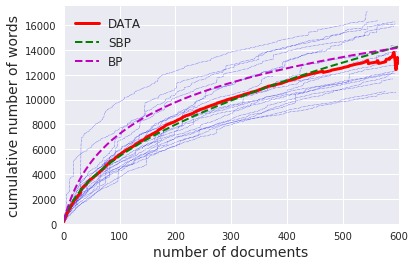

In [27]:
sns.set()
fig=plt.figure()
ax = fig.add_subplot(111)
for name in target_names:
    plt.plot(cumsum_dict[name], ls='dotted', lw=0.5, color='b')
plt.plot(mean_vec,ls='solid',lw='3',color='r', label='DATA')
plt.plot(np.array(stable_mean), ls='--', lw=2, color='g', label='SBP')
plt.plot(np.array(unstable_mean), ls='--', lw=2, color='m', label='BP')
ax.set_xlabel('number of documents', size=14)
ax.set_ylabel('cumulative number of words', size=14)
ax.legend(loc='best', prop={'size': 12})
plt.axis([0,600,0,17500])
plt.show()
fig.savefig("20newsgroups.pdf", bbox_inches='tight')

In [28]:
cumsum_dict = {}
for name in target_names:
    newsgroups_train = fetch_20newsgroups(subset='train', categories=[name])
    vectors = vectorizer.fit_transform(newsgroups_train.data)
    test_mat = vectors
    test_mat.data = np.ones(test_mat.data.size)
    col_sums = test_mat.sum(axis=0)
    
    col_sums = np.asarray(col_sums)

    col_sums = col_sums.flatten() # Col sums ie number of documents where a given word appears

    col_sums = col_sums.astype(int) # careful as col_sums has float values not integers
    
    print(sum(col_sums==1)/len(col_sums))

0.48750731177404527
0.5387467287002036
0.53015355580338
0.5084092830968712
0.48658630060622954
0.5581024349286314
0.4553187974892633
0.46727759305814615
0.411270530488956
0.4218677404367353
0.5089047471300031
0.4885213527524068
0.49412560743064526
0.48688101679984896
0.45941464821222605
0.552717900656045
0.41241970021413277
0.43932785126921703
0.49491980854815687


In [45]:
test_mat.indices

array([ 7980,  6719,  3666, ...,  6351, 11849,  5743], dtype=int32)

In [9]:
results

{'alt.atheism': array([198.74667285,   2.16105923,   0.48360054]),
 'comp.graphics': array([140.36549004,   3.50509722,   0.5334548 ]),
 'comp.os.ms-windows.misc': array([205.23833696,   2.22421786,   0.75368304]),
 'comp.sys.ibm.pc.hardware': array([138.69203993,   2.29142905,   0.53532224]),
 'comp.sys.mac.hardware': array([133.47279447,   2.5861641 ,   0.51227741]),
 'comp.windows.x': array([160.52788748,   4.12381117,   0.48515887]),
 'misc.forsale': array([113.36082894,   3.3136093 ,   0.55840608]),
 'rec.autos': array([162.04158461,   3.54170349,   0.45302091]),
 'rec.motorcycles': array([158.74084051,   3.61755208,   0.4600602 ]),
 'rec.sport.baseball': array([155.61889484,   4.07620497,   0.40415164]),
 'rec.sport.hockey': array([177.09776437,   4.17690863,   0.42064628]),
 'sci.crypt': array([221.26603117,   2.33348502,   0.49566402]),
 'sci.electronics': array([134.95194206,   3.92655025,   0.4908188 ]),
 'sci.med': array([189.41426375,   3.63371218,   0.48895509]),
 'sci.spa

In [163]:
alpha_values=[value[0] for key,value in results.items() if key != 'comp.os.ms-windows.misc']

np.mean(alpha_values)

179.21277188625507

In [166]:
np.std(alpha_values)

38.18472216041763

In [164]:
c_values = [value[1] for key,value in results.items() if key != 'comp.os.ms-windows.misc']
np.mean(c_values)

3.2516003768926973

In [167]:
np.std(c_values)

0.7387519560966981

In [165]:
sig_values = [value[2] for key,value in results.items() if key != 'comp.os.ms-windows.misc']
np.mean(sig_values)

0.47862847862558694

In [168]:
np.std(sig_values)

0.04473775640196883

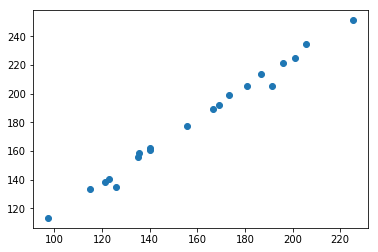

In [25]:
plt.scatter(alpha_est.values(), alpha_values)

# the alpha are 179.2 std 38, the c are 3.25 sd 0.738, the sig are 0.48 sd 0.044

In [169]:
alpha_values=[value[0] for key,value in results_unstable.items() if key != 'comp.os.ms-windows.misc']

np.mean(alpha_values)

182.74677806200262

In [170]:
np.std(alpha_values)

40.36187357575926

In [171]:
c_values = [value[1] for key,value in results_unstable.items() if key != 'comp.os.ms-windows.misc']
np.mean(c_values)

23.54936039376121

In [172]:
np.std(c_values)

5.493918207061103

# for unstable the alpha are 182.7 sd 40.3, c is 23.5 sd 5.49